# Load face_detector and eye_detector and source face image

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import cv2
face_detector = cv2.CascadeClassifier("/content/gdrive/MyDrive/ml/Modern_Computer_Vision/face_recognition/haarcascade_frontalface_default.xml")
eye_detector = cv2.CascadeClassifier("/content/gdrive/MyDrive/ml/Modern_Computer_Vision/face_recognition/haarcascade_eye.xml")

In [3]:
img = cv2.imread("/content/woman.webp")
img_raw = img.copy()

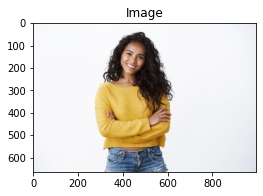

In [4]:
import tarfile
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

imshow("Image", img)

# Find eyes in image

In [5]:
faces = face_detector.detectMultiScale(img, 1.3, 5)
print(faces)
face_x, face_y, face_w, face_h = faces[0]
 
img = img[int(face_y):int(face_y+face_h), int(face_x):int(face_x+face_w)]

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

[[381  94 133 133]]


[[29 29 34 34]
 [79 45 31 31]]


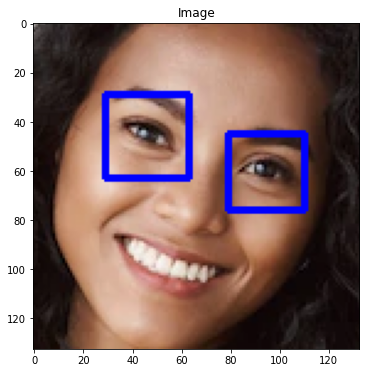

In [6]:
# Blue color in BGR
color = (255, 0, 0)

eyes = eye_detector.detectMultiScale(img_gray, 1.1, 9)

index = 0
eyes = eyes[0:2]
print(eyes)
for (eye_x, eye_y, eye_w, eye_h) in eyes:
   if index == 0:
      eye_1 = (eye_x, eye_y, eye_w, eye_h)
   elif index == 1:
      eye_2 = (eye_x, eye_y, eye_w, eye_h)
 
   cv2.rectangle(img,(eye_x, eye_y),(eye_x+eye_w, eye_y+eye_h), color, 2)
   index = index + 1


imshow("Image", img)

In [7]:
print(eye_2[0])
if eye_1[0] < eye_2[0]: #amp;amp;amp;lt; eye_2[0]:
   left_eye = eye_1
   right_eye = eye_2
else:
   left_eye = eye_2
   right_eye = eye_1

79


In [8]:
left_eye_center = (int(left_eye[0] + (left_eye[2] / 2)), int(left_eye[1] + (left_eye[3] / 2)))
left_eye_x = left_eye_center[0]; left_eye_y = left_eye_center[1]
 
right_eye_center = (int(right_eye[0] + (right_eye[2]/2)), int(right_eye[1] + (right_eye[3]/2)))
right_eye_x = right_eye_center[0]; right_eye_y = right_eye_center[1]
 
cv2.circle(img, left_eye_center, 2, (255, 0, 0) , 2)
cv2.circle(img, right_eye_center, 2, (255, 0, 0) , 2)
cv2.line(img,right_eye_center, left_eye_center,(67,67,67),2)

array([[[132, 133, 137],
        [144, 146, 153],
        [ 76,  79,  85],
        ...,
        [ 27,  30,  36],
        [ 24,  25,  34],
        [ 31,  32,  41]],

       [[149, 150, 155],
        [ 98, 101, 107],
        [ 54,  57,  63],
        ...,
        [ 32,  34,  41],
        [ 27,  29,  38],
        [ 20,  22,  31]],

       [[ 91,  91,  98],
        [ 63,  63,  70],
        [ 79,  79,  86],
        ...,
        [ 29,  29,  36],
        [ 28,  28,  35],
        [ 25,  25,  32]],

       ...,

       [[ 11,  12,  23],
        [ 13,  14,  25],
        [ 16,  17,  28],
        ...,
        [ 14,  13,  23],
        [ 13,  16,  22],
        [ 12,  15,  21]],

       [[  9,  10,  21],
        [ 11,  12,  23],
        [ 13,  14,  25],
        ...,
        [ 13,  12,  22],
        [ 15,  17,  23],
        [ 13,  16,  22]],

       [[  9,  10,  21],
        [  9,  10,  21],
        [ 11,  12,  23],
        ...,
        [ 11,  10,  19],
        [ 13,  16,  22],
        [ 15,  17,  23]]

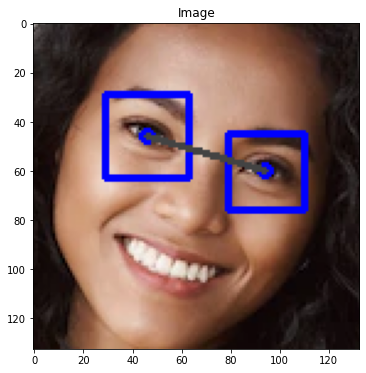

In [9]:
imshow("Image", img)

# Rotate image by eyes position


<div>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20220505152732/imageredesigning3.jpg" width="500"/>
</div>

Now the angel x can be easily calculated from the triangle formed by the eyes and the referenced frame using trigonometry. By applying the Euclidean distance we can get the value of the angle x.

      cos(x) = (b2+ c2– a2 ) / (2bc)
      
<div>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20220505152730/imageredesigning1.jpg" width="500"/>
</div>


rotate to inverse clock direction


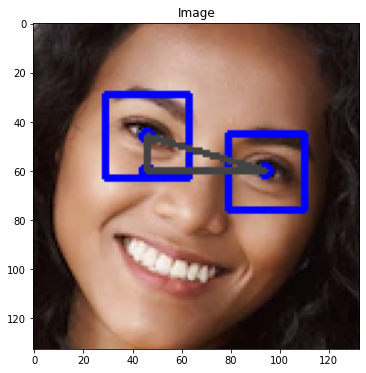

In [10]:
if left_eye_y > right_eye_y: 
   point_3rd = (right_eye_x, left_eye_y)
   direction = -1 #rotate same direction to clock
   print("rotate to clock direction")
else:
   point_3rd = (left_eye_x, right_eye_y)
   direction = 1 #rotate inverse direction of clock
   print("rotate to inverse clock direction")
 
cv2.circle(img, point_3rd, 2, (255, 0, 0) , 2)
 
cv2.line(img,right_eye_center, left_eye_center,(67,67,67),2)
cv2.line(img,left_eye_center, point_3rd,(67,67,67),2)
cv2.line(img,right_eye_center, point_3rd,(67,67,67),2)
imshow("Image", img)

In [11]:
import math
def euclidean_distance(a, b):
    x1 = a[0]; y1 = a[1]
    x2 = b[0]; y2 = b[1]
    return math.sqrt(((x2 - x1) * (x2 - x1)) + ((y2 - y1) * (y2 - y1)))
a = euclidean_distance(left_eye_center, point_3rd)
b = euclidean_distance(right_eye_center, left_eye_center)
c = euclidean_distance(right_eye_center, point_3rd)

In [12]:
cos_a = (b*b + c*c - a*a)/(2*b*c)
print("cos(a) = ", cos_a)
 
angle = np.arccos(cos_a)
print("angle: ", angle," in radian")
 
angle = (angle * 180) / math.pi
print("angle: ", angle," in degree")

cos(a) =  0.96
angle:  0.283794109208328  in radian
angle:  16.260204708311967  in degree


In [13]:
cos_a = (b*b + c*c - a*a)/(2*b*c)
print("cos(a) = ", cos_a)
 
angle = np.arccos(cos_a)
print("angle: ", angle," in radian")
 
angle = (angle * 180) / math.pi
print("angle: ", angle," in degree")

cos(a) =  0.96
angle:  0.283794109208328  in radian
angle:  16.260204708311967  in degree


In [14]:
if direction == -1:
   angle = 90 - angle

from PIL import Image
new_img = Image.fromarray(img_raw)
new_img = np.array(new_img.rotate(direction * angle))

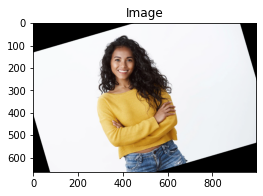

In [15]:
imshow("Image", new_img)